# Part 2

In [1]:
import random
random.seed(1234)
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import regularizers
from keras.regularizers import l1, l2
%matplotlib inline

Using TensorFlow backend.


In [20]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [21]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [22]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [23]:
import numpy as np

k = 10
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    result5 = model.fit(partial_train_data, partial_train_targets,\
                        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [24]:
print('For Model 1, the predicted medium housing markets is', np.mean(all_scores))

For Model 1, the predicted medium housing markets is 2.4474249029159547


In [25]:
def model2():
    model = models.Sequential()
    model.add(layers.Dense(99, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(99, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dense(99, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
import numpy as np

k = 10
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores2 = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = model2()
    result6 = model.fit(partial_train_data, partial_train_targets,\
                        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores2.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [26]:
def model3():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
import numpy as np

k = 10
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores3 = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = model3()
    result7 = model.fit(partial_train_data, partial_train_targets,\
                        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores3.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [27]:
print('For Model 2, the predicted medium housing markets is', np.mean(all_scores2))
print('For Model 3, the predicted medium housing markets is', np.mean(all_scores3))

For Model 2, the predicted medium housing markets is 2.2641634535789494
For Model 3, the predicted medium housing markets is 2.904739990234375


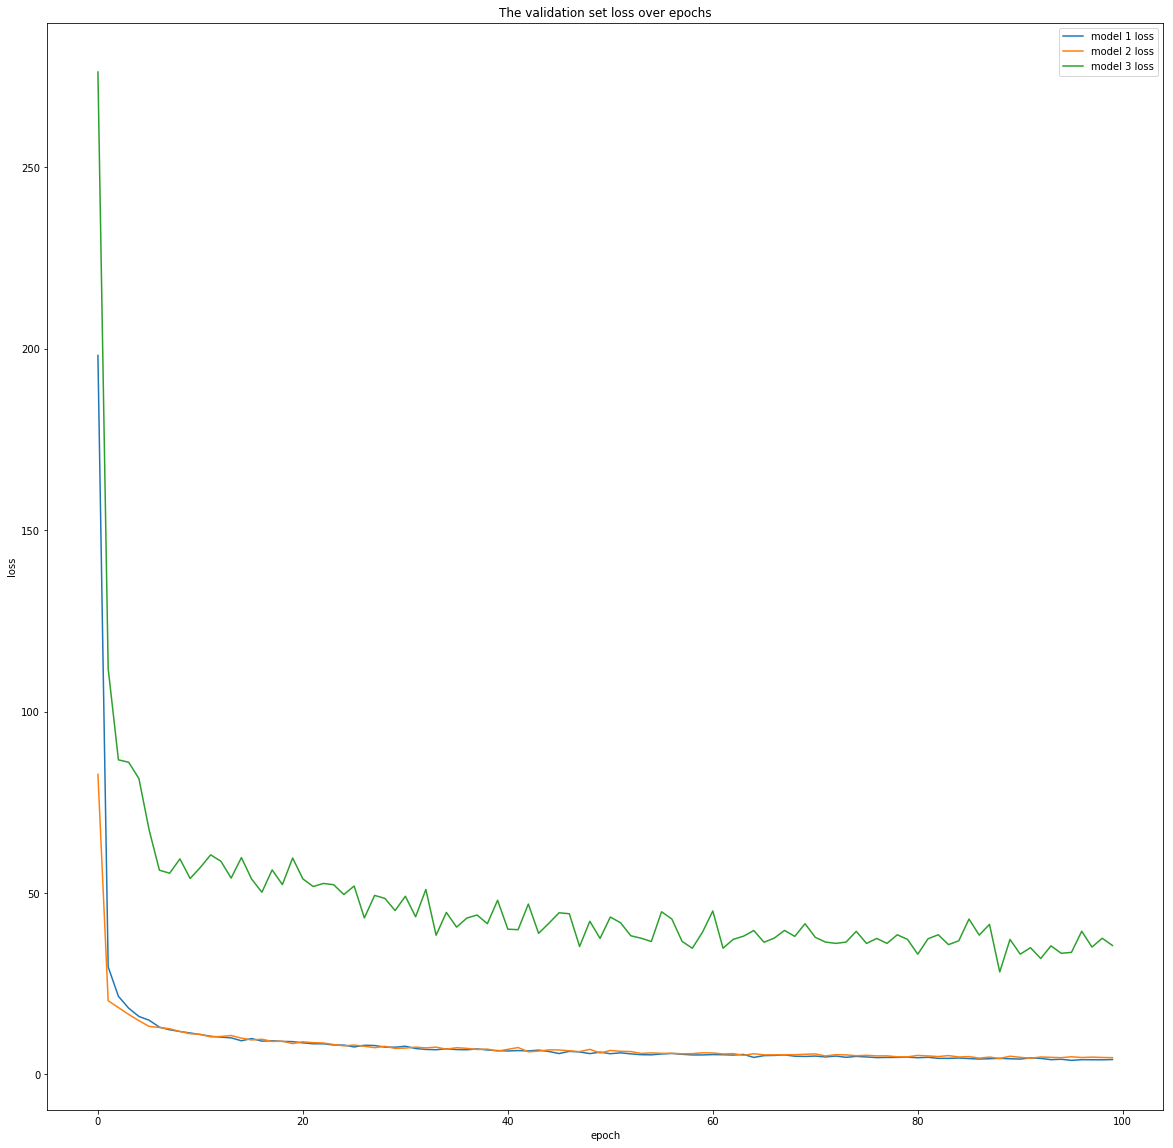

In [31]:
loss5 = result5.history['loss']

loss6 = result6.history['loss']

loss7 = result7.history['loss']

plt.plot(loss5)

plt.plot(loss6)

plt.plot(loss7)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['model 1 loss','model 2 loss', 'model 3 loss'])
plt.title('The validation set loss over epochs')
plt.rcParams["figure.figsize"] = [20,20]
plt.show()

In [50]:
loss_1 = sum(loss5)/len(loss5)
loss_2 = sum(loss6)/len(loss6)
loss_3 = sum(loss7)/len(loss7)
print('The average loss of model 1, 2, and 3 are: ', loss_1, loss_2, loss_3)

The average loss of model 1, 2, and 3 are:  9.013046672673601 7.9611335272759565 47.27953688750026


We can see that the best model is model 2.    
Then train the model using all of the training data.  
I then draw MSEs over epochs.

In [51]:
k = 10
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores8 = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    model = model2()
    result8 = model.fit(train_data, train_targets,\
                        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores8.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [52]:
num_epo = len(result8.history['mean_absolute_error'])
mses = []
for mse in result8.history['mean_absolute_error']:
    mses.append(mse * mse)
epo = []
for i in range(1, num_epo + 1):
    epo.append(i)

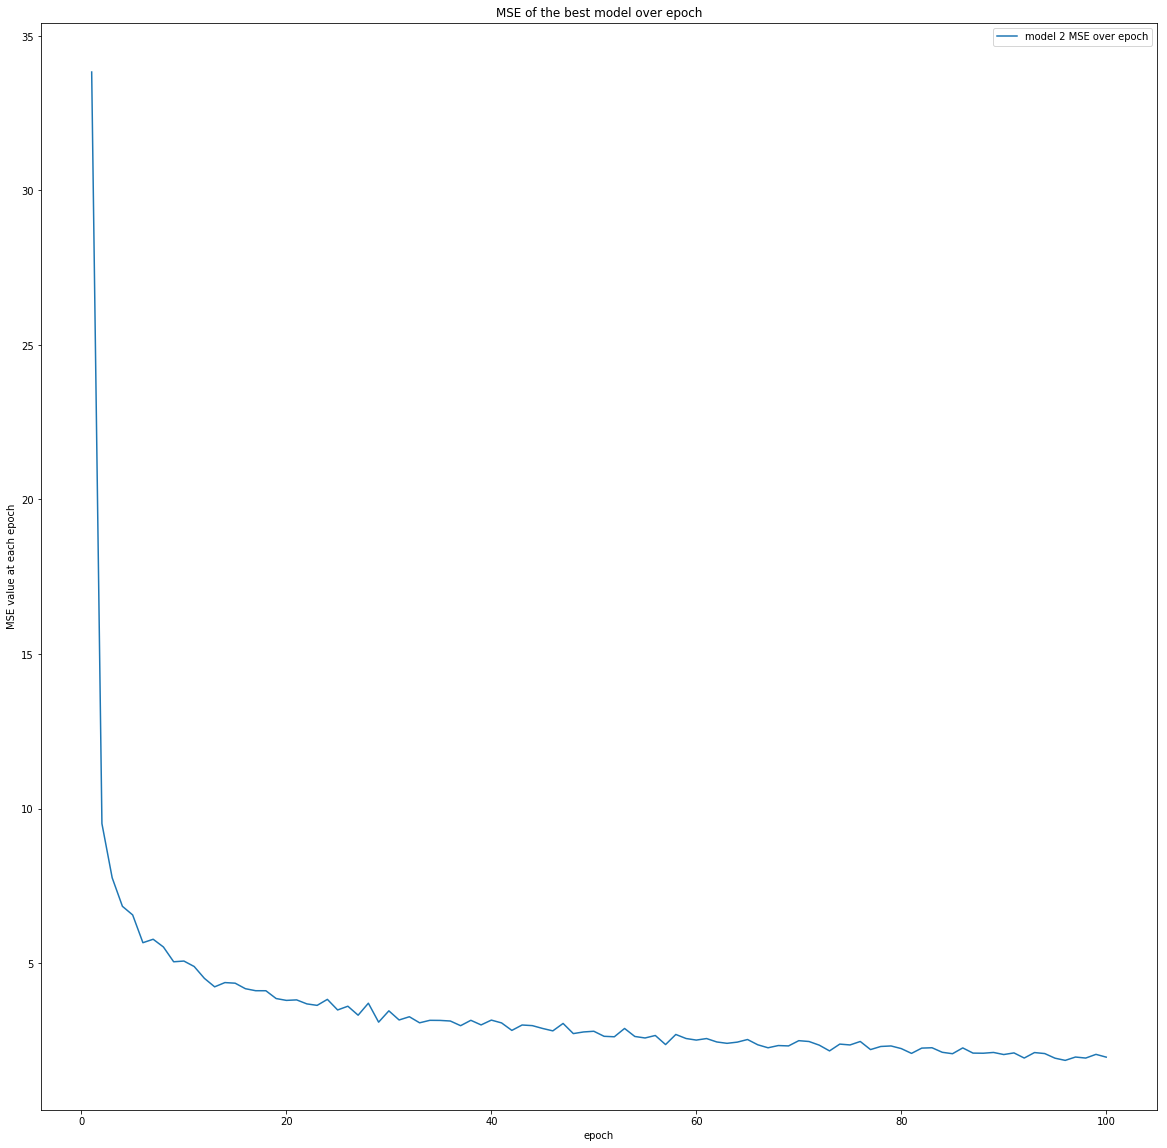

In [53]:
plt.plot(epo, mses)
plt.title('MSE of the best model over epoch')
plt.xlabel('epoch')
plt.ylabel('MSE value at each epoch')
plt.legend(['model 2 MSE over epoch'])
plt.show()

## Reference:  
Chollet, Francois. Deep learning with python. Manning Publications Co., 2017.